In [1]:
from IPython.display import IFrame
IFrame('http://www.polla.cl/Areas/loto/Template_20_ES/index.html#action=results',1024,208)

In [2]:
import pandas as pd
import numpy as np
import os

%matplotlib inline

direccion = 'http://www.polla.cl/cache/dgResultHistoryForGameCSV/ES/Loto.csv'
pd.set_option('display.mpl_style', 'default') # Mejora la visualizacion de los graficos, estilo flat.

Lo primero que debemos hacer es leer el archivo cvs desde la pagina de polla

In [3]:
# %time _ es un "llave magica" de IPython sirve para medir cuanto demora la instrucción 
# Lo primero es leer el archivo desde la pagina
#%time _ = resultados = pd.read_csv(direccion)
%time _ = resultados = pd.read_csv("Loto.csv")

CPU times: user 12.5 ms, sys: 4.89 ms, total: 17.4 ms
Wall time: 26.2 ms


In [4]:
# Lo segundo es guardar el archivo en el equipo
%time _ = resultados.to_csv('resultados_loto.csv',index=False)

CPU times: user 21.6 ms, sys: 2.96 ms, total: 24.6 ms
Wall time: 25.4 ms


In [5]:
#verificamos que este el archivo en la carpeta con el comenado ls, uno de los "tricks" de python.
!ls

Big-Data-Types.jpg             hbr_data.jpg
Ejercicio 00.ipynb             linkedin.jpg
Jeff_Hammerbacher.jpg          logo_vagrant.png
Laboratorio 00.ipynb           loto_loto.xls
Loto.csv                       nate.jpg
MDP_14Apr.jpg                  nategano.jpg
Rise_of_the_Data_Scientist.jpg netflix.jpg
Teoria_00.ipynb                noBigData.jpg
Teoria_00.slides.html          nociencia.gif
VennDiagram.jpg                nociencia2.gif
bd.jpg                         paquetes.txt
bigData.jpg                    practica.jpg
datascience.jpg                resultados_loto.csv
demo                           stack.jpg
disquete.jpg                   teoria.jpg
fb.jpg                         test
fin.jpg                        test.txt
funciones utiles.ipynb         the4.jpg
google.jpg                     toolbox.jpg
googleFlu.jpg                  userena.jpg
hadoop.png                     vagrantWin.txt
harlan.jpg                     yo.jpg


In [6]:
resultados.columns

Index([u'Fecha de Sorteo', u'Numero de sorteo', u'Numero de Juego', u'Nombre', u'Valores Principales', u'Comodines', u'DRAWNAME', u'Ganadores de Premio Mayor', u'Premio Mayor Garantizado'], dtype='object')

Normalizamos los nombres de los campos (por comodidad)

In [7]:
resultados = resultados.rename(columns={'Fecha de Sorteo':'fecha',
                                        'Numero de sorteo':'sorteo',
                                        'Numero de Juego':'juego',
                                        'Nombre':'nombre',
                                        'Valores Principales':'numeros',
                                        'Comodines':'comodines',
                                        'DRAWNAME':'nombre_juego',
                                        'Ganadores de Premio Mayor':'ganadores',
                                        'Premio Mayor Garantizado':'premio',
                                        })

In [8]:
resultados.head()

,fecha,sorteo,juego,nombre,numeros,comodines,nombre_juego,ganadores,premio
0,8/25/2002 12:00:00 AM,1714,1,main,"31,34,26,1,2,28",16,Loto,0,NaN
1,8/25/2002 12:00:00 AM,1714,1,main,"27,19,23,24,10,14",NaN,Revancha,0,NaN
2,8/27/2002 12:00:00 AM,1715,1,main,"13,17,1,28,26,30",19,Loto,0,NaN
3,8/27/2002 12:00:00 AM,1715,1,main,"36,25,9,30,24,13",NaN,Revancha,0,NaN
4,8/29/2002 12:00:00 AM,1716,1,main,"20,14,4,5,30,16",35,Loto,0,NaN


In [9]:
len(resultados)

5180

Dado que estamos buscando solo los numeros ganadores del **Loto**, acotamos el data set solo a este juego.

In [10]:
resultado_loto = resultados.ix[(resultados.nombre_juego=="Loto")]
resultado_loto.tail()

,fecha,sorteo,juego,nombre,numeros,comodines,nombre_juego,ganadores,premio
5160,8/3/2014 12:00:00 AM,3581,1,main,"2,17,21,23,33,36",3,Loto,0,500000000
5164,8/5/2014 12:00:00 AM,3582,1,main,"11,13,24,27,31,32",15,Loto,0,610000000
5168,8/7/2014 12:00:00 AM,3583,1,main,"7,11,24,30,36,41",13,Loto,0,710000000
5172,8/10/2014 12:00:00 AM,3584,1,main,"5,13,19,21,24,33",6,Loto,0,840000000
5176,8/12/2014 12:00:00 AM,3585,1,main,"1,8,16,27,34,35",21,Loto,0,940000000


In [11]:
len(resultado_loto)

1906

Dado que estamos buscando solo los numeros ganadores, acotamos el data set solo a los sorteos con ganadores.

In [12]:
ganadores = resultado_loto.ix[(resultados.ganadores>0)]
len(ganadores)

94

In [13]:
#limpiamos un poco nuestro set de datos:
del ganadores['nombre']
del ganadores['sorteo']
del ganadores['juego']
del ganadores['nombre_juego']
del ganadores['ganadores']

Como se puede observar la columna **numeros** es un strig separado por **","** es es un problema muy comun en set de datos, lo que hay que hacer es separar esa columna en columnas individiduales.

In [14]:
separando = ganadores['numeros'].apply(lambda x: pd.Series(list(x.split(','))))
separando.columns = ['n'+str(x) for x in separando.columns]
loto= ganadores.join(separando)
loto.tail()

,fecha,numeros,comodines,premio,n0,n1,n2,n3,n4,n5
4972,4/15/2014 12:00:00 AM,"2,6,11,23,25,34",10,520000000,2,6,11,23,25,34
5016,5/11/2014 12:00:00 AM,"4,9,15,16,33,34",3,1060000000,4,9,15,16,33,34
5044,5/27/2014 12:00:00 AM,"4,6,11,17,19,33",13,1060000000,4,6,11,17,19,33
5132,7/17/2014 12:00:00 AM,"4,14,18,20,28,34",32,5670000000,4,14,18,20,28,34
5148,7/27/2014 12:00:00 AM,"1,4,10,21,28,30",24,640000000,1,4,10,21,28,30


In [15]:
loto.dtypes

fecha         object
numeros       object
comodines    float64
premio       float64
n0            object
n1            object
n2            object
n3            object
n4            object
n5            object
dtype: object

Como podemos ver los numeros que separamos en el paso anterior son de tipo **`object`** para poder trabajar debemos pasar a un formato numerico ej, **`float64`**

In [16]:
loto[['n0','n1','n2','n3','n4','n5']]=loto[['n0','n1','n2','n3','n4','n5']].astype(float)
loto.dtypes

fecha         object
numeros       object
comodines    float64
premio       float64
n0           float64
n1           float64
n2           float64
n3           float64
n4           float64
n5           float64
dtype: object

In [17]:
millonarios = loto[['n0','n1','n2','n3','n4','n5']].stack().value_counts()

In [18]:
millonarios.head(6)

5     23
4     21
18    20
15    20
22    20
21    19
dtype: int64

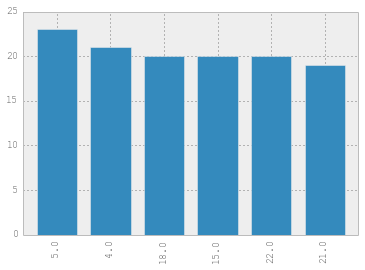

In [19]:
#Los mejores
millonarios.head(6).plot(kind='bar')

In [20]:
#los peores
millonarios.tail(6)

39    9
35    8
24    7
41    6
40    5
37    5
dtype: int64

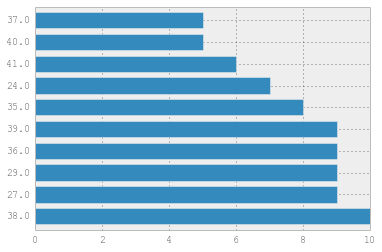

In [21]:
millonarios.tail(10).plot(kind="barh")